# **Spam Mail Prediction  XGB vs. LR vs. LGBM**

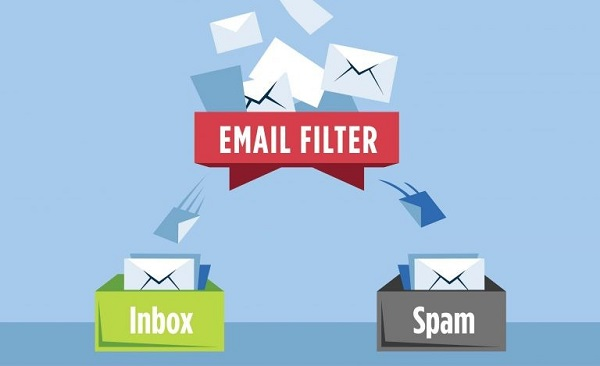

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

**Data Collection & Pre-Processing**

In [2]:
raw_mail_data = pd.read_csv('../input/spam-mails-dataset/spam_ham_dataset.csv')

In [3]:
raw_mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
raw_mail_data.shape

(5171, 4)

In [5]:
raw_mail_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [6]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [7]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5171, 4)

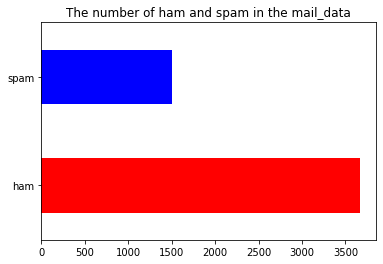

In [8]:
mail_data["label"].value_counts().plot.barh(color = ["r","b"]);
plt.title('The number of ham and spam in the mail_data');

**spam - 1**

**ham - 0**

In [9]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
mail_data['text'][0]

Before cleaning:


"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [10]:
print('After cleaning:')
clean_str(mail_data['text'][0])

After cleaning:


'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [11]:
# Create a new column with the cleaned messages
mail_data['text_clean'] = mail_data['text'].apply(lambda string: clean_str(string))

# Display the result
mail_data.head()

,Unnamed: 0,label,text,label_num,text_clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached file ...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...


**Separating the data as texts and label**

In [12]:
X = mail_data['text_clean']

Y = mail_data['label_num']

In [13]:
print(X)

0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: text_clean, Length: 5171, dtype: object


In [14]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


**Splitting the data into training data & test data**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(3619,)
(1552,)


**Feature Extraction**

In [17]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
print(X_train)

1023    subject re tenaska i see the demand fee change...
4586    subject strong buy alert monthly newsletter to...
2955    subject performance feedback each of you have ...
2495    subject hr performance objectives binders good...
3353    subject fw fwd fw drawing by a school age chil...
                              ...                        
4426    subject re ena sales on hpl last that i had wa...
466     subject tenaska iv bob i understand from sandi...
3092    subject broom bristles up flew be differentiab...
3772    subject calpine daily gas nomination weekend r...
860     subject re meter yep you re right except it s ...
Name: text_clean, Length: 3619, dtype: object


In [19]:
print(X_train_features)

  (0, 21459)	0.17731068592284166
  (0, 14810)	0.15204873872894042
  (0, 22228)	0.16668287127758485
  (0, 3691)	0.21357004632612675
  (0, 9016)	0.10204229152410318
  (0, 26273)	0.3204820763006247
  (0, 1680)	0.6168232276857645
  (0, 26358)	0.17329829912907024
  (0, 15043)	0.15764132892431446
  (0, 20358)	0.1968423394970939
  (0, 6015)	0.25563516603446107
  (0, 26269)	0.24785456486048218
  (0, 35939)	0.2030080333359236
  (0, 6019)	0.15161809589101455
  (0, 12937)	0.17254465724342596
  (0, 9341)	0.18132783009786793
  (0, 32669)	0.17254465724342596
  (0, 31789)	0.03768083817890591
  (1, 13997)	0.019772745355135526
  (1, 22585)	0.02201836277246234
  (1, 6124)	0.013054353216415576
  (1, 31880)	0.017917931389070493
  (1, 26816)	0.018362427503010623
  (1, 11802)	0.020247702657594648
  (1, 26846)	0.023982085854569242
  :	:
  (3618, 5490)	0.11457329089635379
  (3618, 13436)	0.12337741196903333
  (3618, 28550)	0.1046960421710023
  (3618, 20169)	0.09701420138880724
  (3618, 11617)	0.10266084305094

**Training the Models**

In [20]:
models = {
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "LGBM": {"model":LGBMClassifier(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train_features, Y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

XGBoost              trained in 4.23 sec
Logistic Regr.       trained in 0.67 sec
LGBM                 trained in 2.02 sec


In [21]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test_features, Y_test),model["perf"]])

In [22]:
mail_data_acc = pd.DataFrame(models_acc)
mail_data_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
mail_data_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
mail_data_acc.reset_index(drop = True, inplace=True)
mail_data_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Logistic Regr.,0.989046,0.67
1,LGBM,0.975515,2.02
2,XGBoost,0.964562,4.23


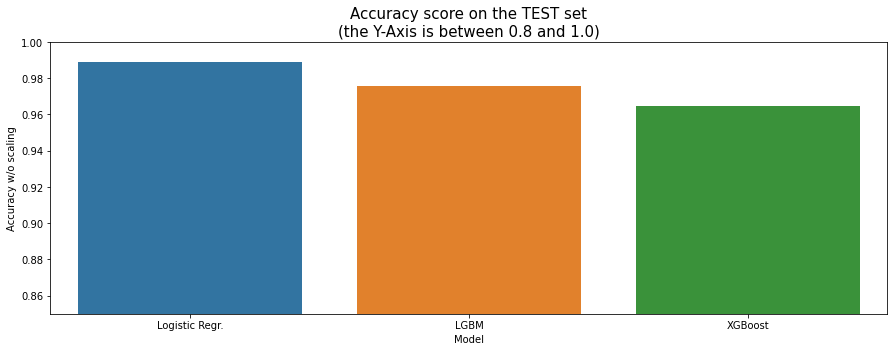

In [23]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = mail_data_acc)
plt.title('Accuracy score on the TEST set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.85,1)
plt.show()

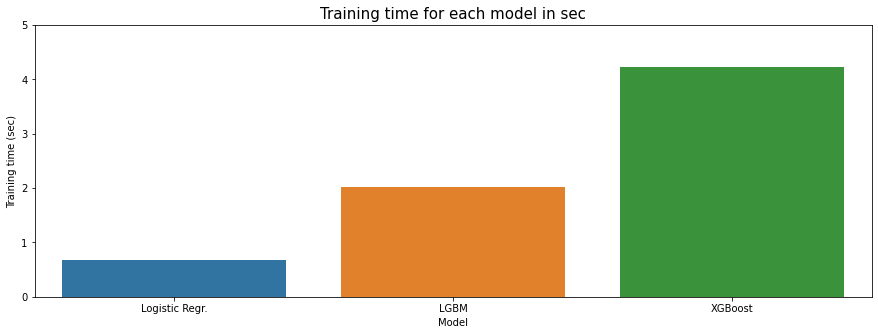

In [24]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = mail_data_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,5)
plt.show()


**Logistic Regression gives the best results on the sets set**.**Both on the accuracy score and time**